# **Simulatie alleen aluminium**

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.optimize import curve_fit

### **Constanten**

In [39]:
dt = 0.00005 # s
dx = 0.0001 # m

l_l, rho_l, c_l = (210, 2.6989e3, 900) # https://www.matweb.com/search/datasheet.aspx?bassnum=AMEAL00&ckck=1

# x_staaf = 0.3 # (m) Staaf lengte
x = 2e-3 #(m) Simluatie lengte
t = 1 # (s) Simulatie tijd

T_0 = 20 + 273.15
T_x0 = 100 + 273.15

i_max, k_max = (int(x/dx), int(t/dt))

### **Oplossen**

In [40]:
# Initieer oplossing
T = np.empty((k_max, i_max))

# Initiele waarden
T.fill(T_0)

# Randvoorwaarden
T[:,:1] = T_x0

def calculate_T(T):
    try:
        for k in tqdm(range(0, k_max-1)):
            for i in range(1, i_max):
                
                c_A = c_l * rho_l
                
                cfl_term = l_l * dt / (dx**2 * c_A)
                if cfl_term > 0.5:
                    raise ValueError(f"CFL condition violated: {cfl_term}. Reduce dt or increase dx.")
            
                try:
                    T[k + 1, i] = T[k,i] + (dt/dx**2/c_A)*l_l*(T[k,i+1]-2*T[k,i]+T[k,i-1])
                except IndexError:
                    T[k + 1, i] = T[k,i] + (dt/dx**2/c_A)*l_l*(T[k,i-1]-T[k,i])

    except Exception as e:
        print(e)
        return T
    return T

T = calculate_T(T)

100%|██████████| 19999/19999 [00:00<00:00, 22348.09it/s]


T(x=2mm, t)


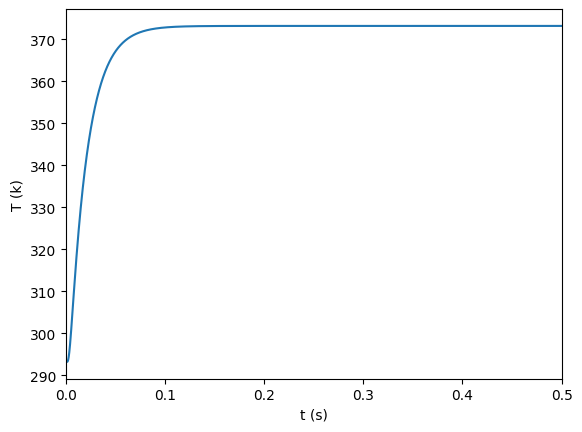

In [41]:
t_sim = np.arange(0,t,dt)
T_sim = T[:,-1]

print('T(x=2mm, t)')
plt.figure()
plt.plot(t_sim, T_sim)
plt.xlabel('t (s)')
plt.ylabel('T (k)')
plt.xlim((0,0.5))
plt.show()